<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

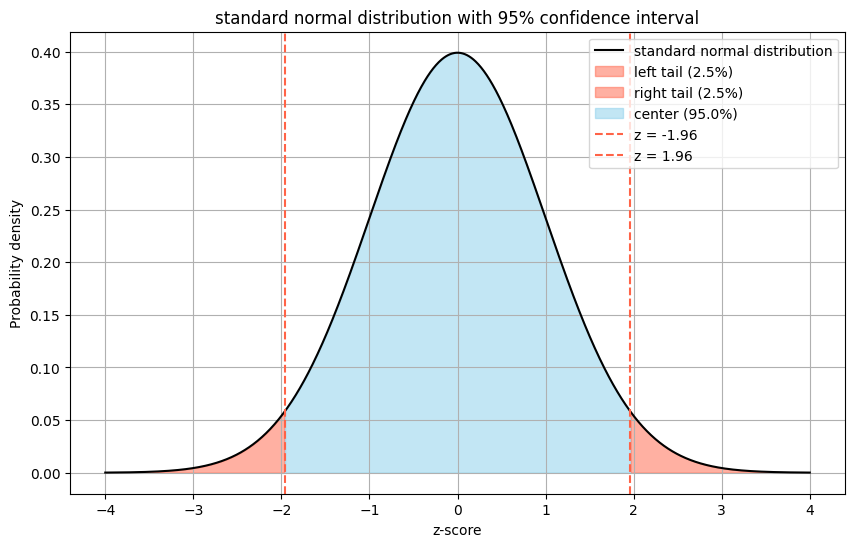

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

confidence_level = 0.95
alpha = 1 - confidence_level
alpha_half = alpha / 2

left_tail_area = alpha_half * 100
right_tail_area = alpha_half * 100
confidence_area = confidence_level * 100

z_critical = stats.norm.ppf(1 - alpha_half)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='standard normal distribution', color='black')
plt.fill_between(x, y, where=(x <= -z_critical), color='tomato', alpha=0.5, label=f'left tail ({left_tail_area:.1f}%)')
plt.fill_between(x, y, where=(x >= z_critical), color='tomato', alpha=0.5, label=f'right tail ({right_tail_area:.1f}%)')
plt.fill_between(x, y, where=(x > -z_critical) & (x < z_critical), color='skyblue', alpha=0.5, label=f'center ({confidence_area:.1f}%)')
plt.axvline(-z_critical, color='tomato', linestyle='dashed', label=f'z = -{z_critical:.2f}')
plt.axvline(z_critical, color='tomato', linestyle='dashed', label=f'z = {z_critical:.2f}')
plt.title(f'standard normal distribution with {confidence_level*100:.0f}% confidence interval')
plt.xlabel('z-score')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
sample_mean = 5.2
sample_std = 2.1
sample_size = 30

standard_error = sample_std / (sample_size ** 0.5)

confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

margin_of_error = z_critical * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

confidence_interval = (lower_bound, upper_bound)
print(f'confidence interval=[{lower_bound: .2f}, - {upper_bound: .2f} ] with confidence level={confidence_level} (significance level={alpha: .2f})')

confidence interval=[ 4.45, -  5.95 ] with confidence level=0.95 (significance level= 0.05)


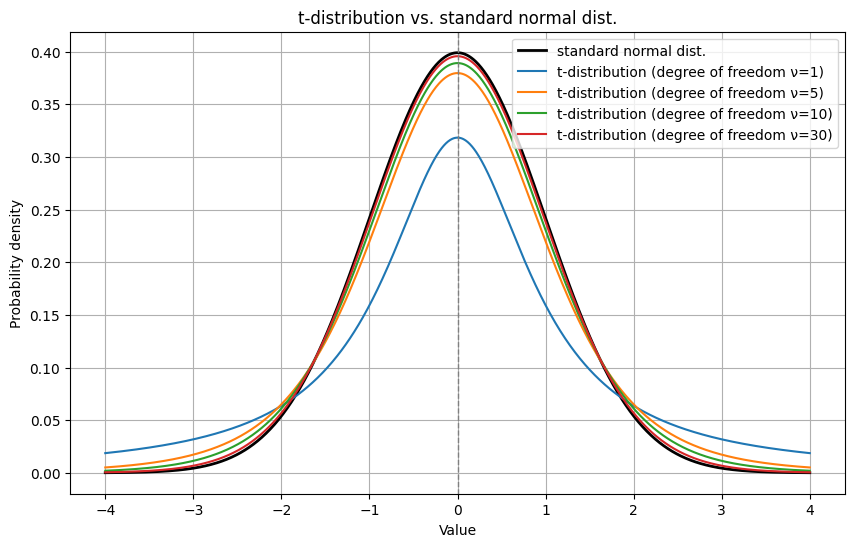

In [3]:
# degree of freedom
ν_list = [1, 5, 10, 30]
x = np.linspace(-4, 4, 1000)
normal_dist = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, normal_dist, label='standard normal dist.', color='black', linewidth=2)
for ν in ν_list:
    t_dist = stats.t.pdf(x, ν)
    plt.plot(x, t_dist, label=f't-distribution (degree of freedom ν={ν})')
plt.title('t-distribution vs. standard normal dist.')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

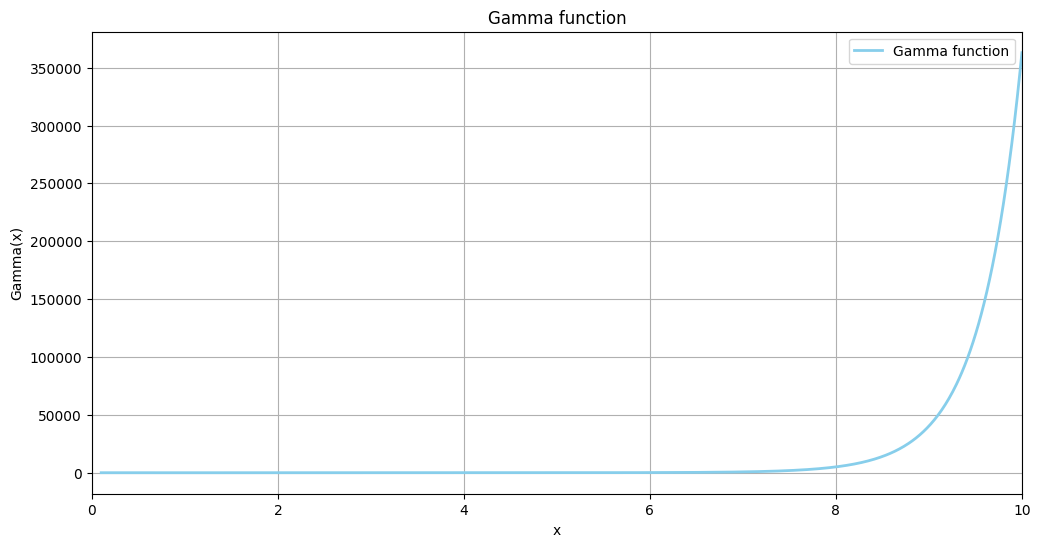

In [4]:
from scipy.special import gamma

gamma_x = np.linspace(0.1, 10, 1000)
gamma_y = gamma(gamma_x)

plt.figure(figsize=(12, 6))
plt.plot(gamma_x, gamma_y, label='Gamma function', color='skyblue', linewidth=2)
plt.xlim(0, 10)
plt.xlabel('x')
plt.ylabel('Gamma(x)')
plt.title('Gamma function')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
x_values = np.linspace(-4, 4, 1000)

normalization_n = 1 / np.sqrt(2 * np.pi)
scaling_factor_n = np.exp(-x_values**2 / 2)
normal_distribution = normalization_n * scaling_factor_n

ν = 29  # Degree of freedom. sample size =6
numerator_t = gamma((ν + 1) / 2)
denominator_t = np.sqrt(ν * np.pi) * gamma(ν / 2)
normalization_t = numerator_t / denominator_t
scaling_factor_t = (1 + (x_values**2 / ν)) ** (-(ν + 1) / 2)
t_distribution = normalization_t * scaling_factor_t

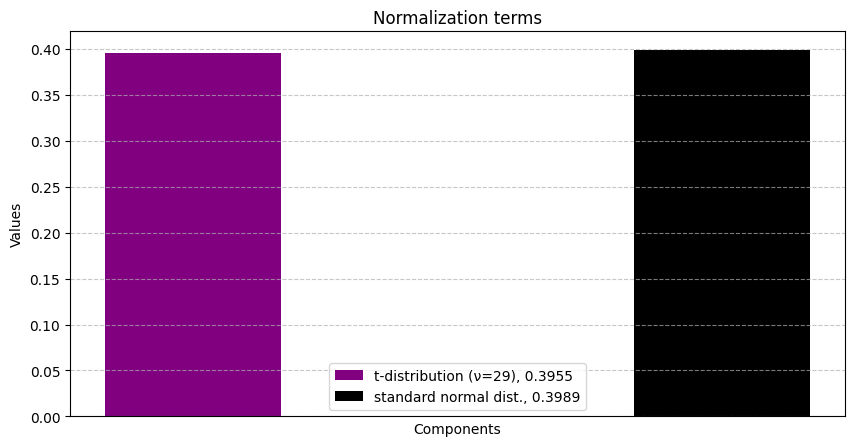

In [11]:
values_t = [normalization_t]
values_n = [normalization_n]
x = np.arange(1)
bar_width = 0.1
bar_spacing = 0.15
plt.figure(figsize=(10, 5))
plt.bar(x - bar_spacing, values_t, width=bar_width, label=f't-distribution (ν={ν}), {normalization_t:.4f}', color='purple')
plt.bar(x + bar_spacing, values_n, width=bar_width, label=f'standard normal dist., {normalization_n:.4f}', color='black')
plt.xticks([])
plt.xlabel('Components')
plt.ylabel('Values')
plt.title('Normalization terms')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

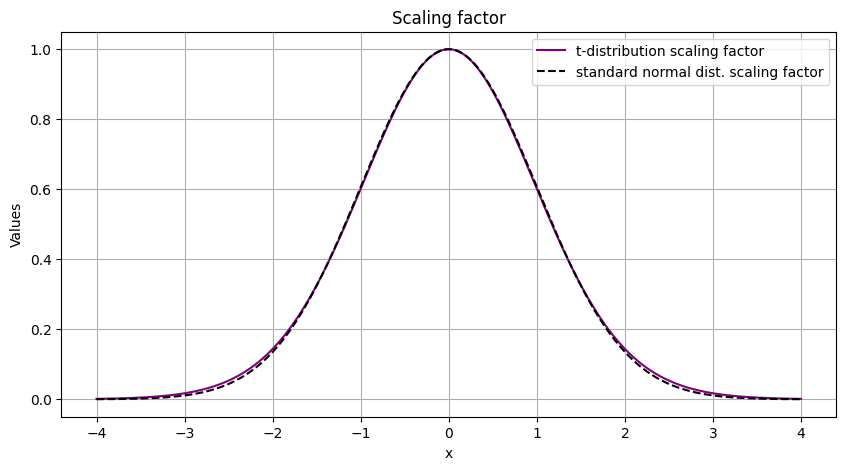

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, scaling_factor_t, label='t-distribution scaling factor', color='purple')
plt.plot(x_values, scaling_factor_n, label='standard normal dist. scaling factor', color='black', linestyle='dashed')
plt.title('Scaling factor')
plt.xlabel('x')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

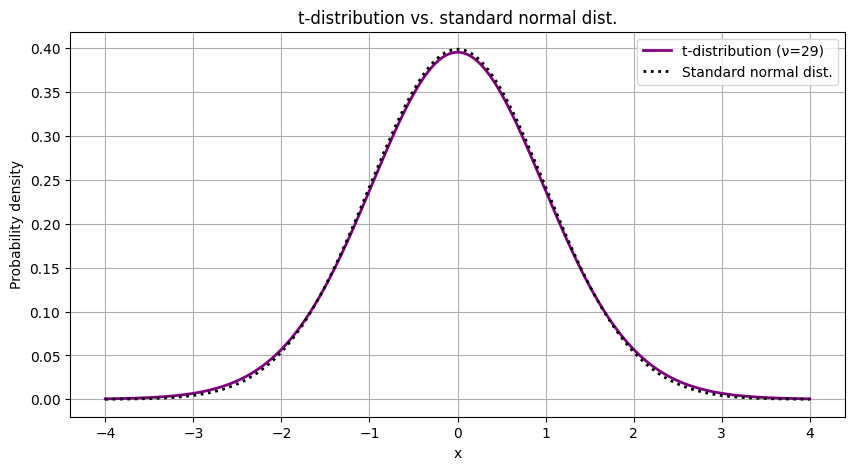

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, t_distribution, label=f't-distribution (ν={ν})', color='purple', linewidth=2)
plt.plot(x_values, normal_distribution, label='Standard normal dist.', color='black', linewidth=2, linestyle='dotted')
plt.title('t-distribution vs. standard normal dist.')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

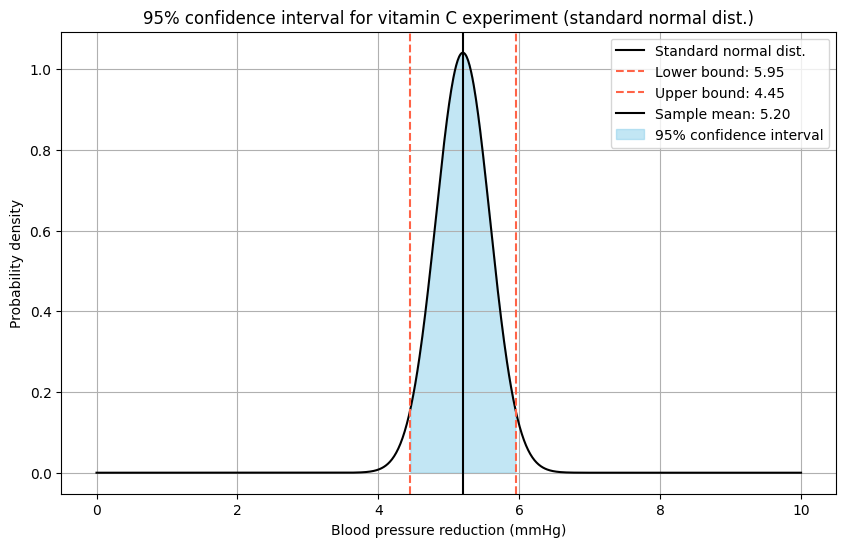

In [9]:
from scipy.stats import norm

sample_mean = 5.2
sample_std = 2.1
sample_size = 30
confidence_level = 0.95

standard_error = sample_std / np.sqrt(sample_size)
z_critical = norm.ppf((1 - confidence_level) / 2)

margin_of_error = z_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

x_values = np.linspace(0, 10, 1000)
normal_dist = norm.pdf(x_values, loc=sample_mean, scale=standard_error)

plt.figure(figsize=(10, 6))
plt.plot(x_values, normal_dist, label='Standard normal dist.', color='black')
plt.axvline(confidence_interval[0], color='tomato', linestyle='--', label=f'Lower bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='tomato', linestyle='--', label=f'Upper bound: {confidence_interval[1]:.2f}')
plt.axvline(sample_mean, color='black', linestyle='-', label=f'Sample mean: {sample_mean:.2f}')
plt.fill_between(x_values, normal_dist, where=(x_values <= confidence_interval[0]) &
                 (x_values >= confidence_interval[1]), color='skyblue', alpha=0.5, label='95% confidence interval')
plt.title("95% confidence interval for vitamin C experiment (standard normal dist.)")
plt.xlabel("Blood pressure reduction (mmHg)")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True)
plt.show()

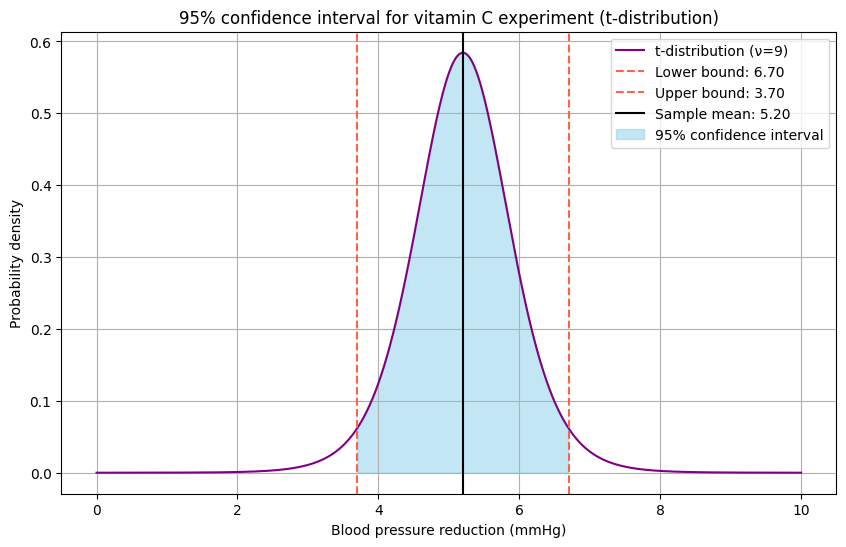

In [14]:
from scipy.stats import t

sample_size = 10
ν = sample_size - 1

standard_error = sample_std / np.sqrt(sample_size)
t_critical = t.ppf((1 - confidence_level) / 2, ν)

margin_of_error = t_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

x_values = np.linspace(0, 10, 1000)
t_dist = t.pdf(x_values, ν, loc=sample_mean, scale=standard_error)

plt.figure(figsize=(10, 6))
plt.plot(x_values, t_dist, label=f't-distribution (ν={ν})', color='purple')
plt.axvline(confidence_interval[0], color='tomato', linestyle='--', label=f'Lower bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='tomato', linestyle='--', label=f'Upper bound: {confidence_interval[1]:.2f}')
plt.axvline(sample_mean, color='black', linestyle='-', label=f'Sample mean: {sample_mean:.2f}')
plt.fill_between(x_values, t_dist, where=(x_values <= confidence_interval[0]) & (x_values >= confidence_interval[1]),
                 color='skyblue', alpha=0.5, label='95% confidence interval')
plt.title("95% confidence interval for vitamin C experiment (t-distribution)")
plt.xlabel("Blood pressure reduction (mmHg)")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True)
plt.show()

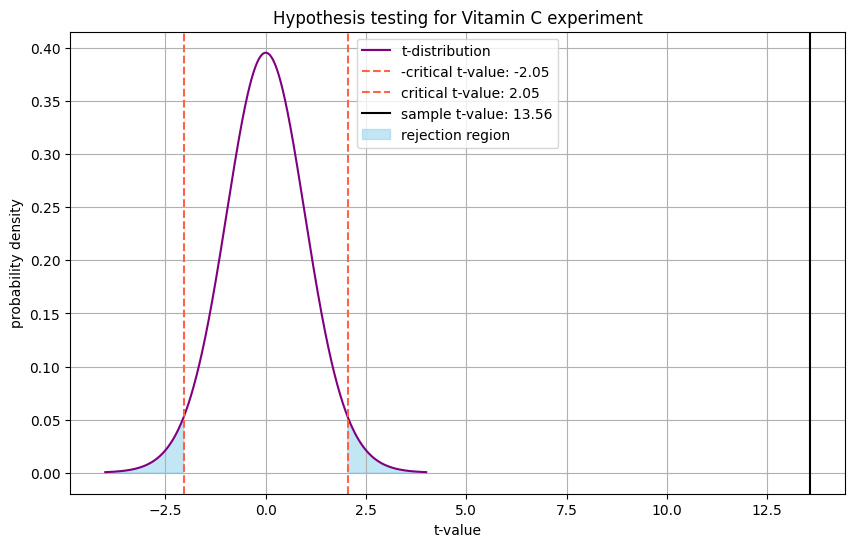

sample mean: 5.20
standard error: 0.38
statistic: 13.56
critical t-value: 2.05
p-value: 0.00000
result: reject the null hypothesis (significant difference)


In [15]:
# Hypothesis testing for Vitamin C experiment
sample_mean = 5.2
sample_std = 2.1
sample_size = 30

population_mean = 0
alpha = 0.05 #실수할 확률

standard_error = sample_std / np.sqrt(sample_size)
statistic = (sample_mean - population_mean) / standard_error
critical = t.ppf(1 - alpha / 2, df=sample_size - 1)
p_value = 2 * (1 - t.cdf(abs(statistic), df=sample_size - 1))

x_values = np.linspace(-4, 4, 1000)
y_values = t.pdf(x_values, df=sample_size - 1)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='t-distribution', color='purple')
plt.axvline(-critical, color='tomato', linestyle='--', label=f'-critical t-value: {-critical:.2f}')
plt.axvline(critical, color='tomato', linestyle='--', label=f'critical t-value: {critical:.2f}')
plt.axvline(statistic, color='black', linestyle='-', label=f'sample t-value: {statistic:.2f}')
plt.fill_between(x_values, y_values, where=(x_values <= -critical) | (x_values >= critical), color='skyblue', alpha=0.5, label='rejection region')
plt.title('Hypothesis testing for Vitamin C experiment')
plt.xlabel('t-value')
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()

print(f'sample mean: {sample_mean:.2f}')
print(f'standard error: {standard_error:.2f}')
print(f'statistic: {statistic:.2f}')
print(f'critical t-value: {critical:.2f}')
print(f'p-value: {p_value:.5f}')
if abs(statistic) > critical:
    print('result: reject the null hypothesis (significant difference)')
else:
    print('result: fail to reject the null hypothesis (no significant difference)')

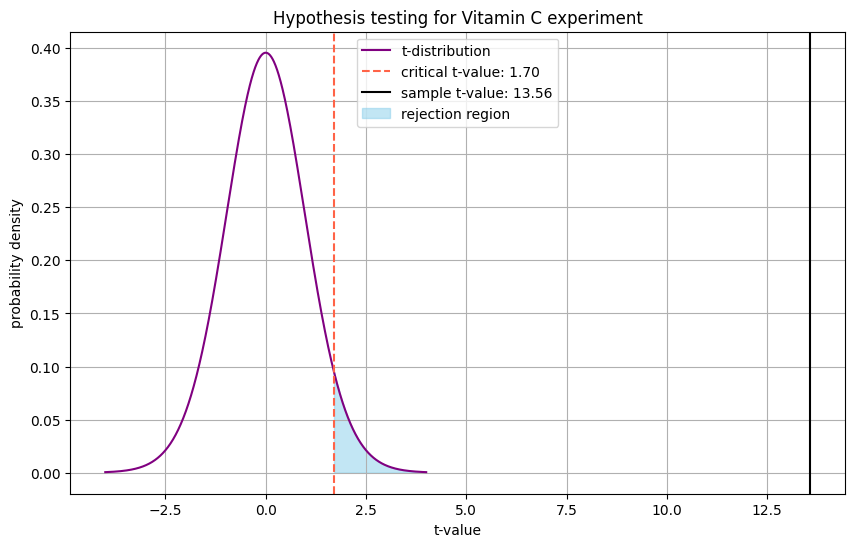

sample mean: 5.20
standard error: 0.38
statistic: 13.56
critical t-value: 1.70
p-value: 0.00000
result: reject the null hypothesis 
	 (Vitamin C significantly reduces blood pressure)


In [38]:
# Hypothesis testing for Vitamin C experiment (one-sided test)

# Do something...
...

sample_mean = 5.2
sample_std = 2.1
sample_size = 30

population_mean = 0
alpha = 0.05 #실수할 확률

standard_error = sample_std / np.sqrt(sample_size)
statistic = (sample_mean - population_mean) / standard_error
critical = t.ppf(1 - alpha, df=sample_size - 1)
p_value = 2 * (1 - t.cdf(abs(statistic), df=sample_size - 1))

x_values = np.linspace(-4, 4, 1000)
y_values = t.pdf(x_values, df=sample_size - 1)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='t-distribution', color='purple')
plt.axvline(critical, color='tomato', linestyle='--', label=f'critical t-value: {critical:.2f}')
plt.axvline(statistic, color='black', linestyle='-', label=f'sample t-value: {statistic:.2f}')
plt.fill_between(x_values, y_values, where=(x_values >= critical), color='skyblue', alpha=0.5, label='rejection region')
plt.title('Hypothesis testing for Vitamin C experiment')
plt.xlabel('t-value')
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()

print(f'sample mean: {sample_mean:.2f}')
print(f'standard error: {standard_error:.2f}')
print(f'statistic: {statistic:.2f}')

print(f'critical t-value: {critical:.2f}')
print(f'p-value: {p_value:.5f}')
if abs(statistic) > critical:
    print('result: reject the null hypothesis \n\t (Vitamin C significantly reduces blood pressure)')
else:
    print('result: fail to reject the null hypothesis (no significant difference)')